# Projekt z przedmiotu Podstawy Sztucznej Inteligencji
Zuzanna Śmiech(289682), Mikołaj Ogarek(297264) <br>
WEAIiIB Informatyka 3 rok <br>
Rok akademicki 2019/2020 <br>

Odnośnik to wytycznych projektu: https://ai.ia.agh.edu.pl/wiki/pl:dydaktyka:psi:start#organizacja_zajec_i_zasady_zaliczenia


# Wstępna eksploracja

### Opis eksperymentu

Tematem całego badania było "Bio-Reactions and Faces for Emotion-based Personalization", jednakże przedmiotem, który poddaliśmy analizie jest prezentacja obrazów i dźwięków stymulujących z systemem oceniania w skali 1-5 (gdzie 1 to bardzo negatywny, a 5 to bardzo pozytywny). 

Każdy badany otrzymywał 6 sekundową prezentację obrazu i dźwięku. Nastepnie każdy miał 9 sekund na ocene, po czym była 1 sekundowa przerwa przed kolejnym przykładem.

Obrazy i dźwięki były nacechowane emocjonalnie pozytywnie, neutralnie lub negatywnie. Nacechowanie obrazu mogło (i bardzo często) różniło się od nacechowania dźwięku. 

### Dane uzyskane
Podczas eksperymentu zebrano wiele danych o uczestnikach jak wiek, płeć, czas rozpoczęcia konkretnej procedury, wyniki pomiarów biosygnałów (ECG, GSR), logi dotyczące materiałów stymulujących... 

Wyniki zostały zebrane w wielu plikach: BIRAFFE-metadata.csv, BIRAFFE-biosigs.zip, BIRAFFE-procedure.zip, BIRAFFE-photo.zip, BIRAFFE-photo-full.zip

### Temat projektu
Tematem naszego projektu jest stworzenie modelu predykcji emocji odczuwanych przez człowieka na podstawie danych z czujników EKG i EDA oraz materiału stymulującego składającego się z pary- dźwięku i obrazu. 

### Co wykorzystujemy
Jakie dane będą nas interesować?: COND(czy para dzwięk i obraz nacechowane są zbieżnie),COND-DETAILS(jak dokładnie nacechowane są obrazy i dźwięki), ANS(ocena emocji badanego w skali 1-5), ANS-TIME, EKG-MEAN, EDA-MEAN, EKG-STD, EDA-STD. (Używamy tutaj średniej i odchylenia standardowego w celu opisania zmienności procesów przewodnictwa skórnego oraz aktywności elektrycznej pracy serca)

### Jak zbierzemy te dane?
Każdy rekord w pliku BIRAFFE-metadata.csv to jedna osoba z zaznaczoną datą rozpoczęcia badania i zakończenia. Dla każdej z nich przeszukano pliki z wyników pomiarów EKG i GSR w celu:

a) znalezienia danych z odpowiedniego przedziału czasowego

b) obliczenie średniej i odchylenia standardowego dla parametrów EKG i GSR. 

Dopasowano również nacechowanie emocjonalne materiałów stymulujących. 
W tym programie łaczymy ze sobą dane z Procedure z Biosigns (dla każdej badanej osoby).


In [25]:
#W celu uruchomienia skryptu należy w folderze zawierającym ten notebook rozpakować pliki: 
#BIRAFFE-biosigs.zip oraz BIRAFFE-procedure.zip i umieścić plik BIRAFFE-metadata.csv
#Dostępne pod adresem: https://zenodo.org/record/3442144#.Xg3VByZ7nCI

# kod, w którym przeglądamy pętlami po odpowiednich plikach CSV 
# i łączymy odpowiednie osoby z obrazami, które zostały im wyświetlone, 
# ich nacechowaniem oraz wynikami pomiarów EKG i GSR (uśrednione - to też obliczamy)

# UWAGA: CZAS DZIAŁANIA PROCEDURY TO KILKANAŚCIE GODZIN!!! 

# %run -i 'prepare_CSV.py'


# W pliku z projektem dostarczono gotowy plik CSV wygenerowany w skutku działania poniższego skryptu. 

In [2]:
import pandas as pd

"""
tutaj wybierzemy dane z pliku PSIProjectData.csv, 
te które nas interesują (wcześniej zebraliśmy trochę więcej danych - na przyszłość :) )
robimy nowy finalny plik z oceną w skali 1-5
dodajemy osobno nacechowanie -1(negatywnie) 0 1(pozytywnie) 
zmieniamy zbieżność nacechowania na wartość numeryczną
"""

new_df = pd.read_csv("PSIProjectData.csv", sep=",")
list_pics=[]
list_sounds=[]
list_conds=[]

#pozbywamy się wartości ocenianych inaczej niż przez wartości 1-5
new_df = new_df[new_df['WIDGET-TYPE'] != 'emospace1']

for rekord in new_df.index:
    
    #wprowadzamy kolumnę odnośnie nacechowania obrazu
    if(new_df['COND-DETAILS'][rekord][1]=='+'):
        pic = 1
    elif(new_df['COND-DETAILS'][rekord][1]=='-'):
        pic = -1
    else: 
        pic = 0
        
    #wprowadzamy kolumnę odnośnie nacechowania dźwięku        
    if(new_df['COND-DETAILS'][rekord][3]=='+'):
        sound = 1
    elif(new_df['COND-DETAILS'][rekord][3]=='-'):
        sound = -1
    else: 
        sound = 0
        
    #modyfikujemy zmienną COND na wartość numeryczną
    if(new_df['COND'][rekord]=='con'):
        cond = 1
    else: 
        cond = 0
            
    list_pics.append(pic)
    list_sounds.append(sound)
    list_conds.append(cond)
    
#modyfikacje w csv, usuwamy niepotrzebne dane(głównie ID obrazu, timestamp, wartości, które rozbiliśmy na pojedyncze - COND-DETAILS)
new_df.insert(14, "PIC", list_pics) 
new_df.insert(15, "SOUND", list_sounds)
new_df.insert(16, "CO", list_conds)
new_df = new_df.drop('Unnamed: 0', axis=1)
new_df = new_df.drop('TIMESTAMP', axis=1)
new_df = new_df.drop('COND-DETAILS', axis=1)
new_df = new_df.drop('IADS-ID', axis=1)
new_df = new_df.drop('IAPS-ID', axis=1)
new_df = new_df.drop('WIDGET-TYPE', axis=1)
new_df = new_df.drop('ID', axis=1)
new_df = new_df.drop('COND', axis=1)
  
new_df.to_csv(r'PSIProjectDatafinal.csv', index=False)


Wstępna eksploracja danych to przede wszystkim analiza całego badania, wybranie odpowiednich danych dla naszego problemu. Następnie znalezienie i zaimplementowanie odpowiedniego programu łączącego wiele plików CSV, w jeden plik CSV, w którym znajdą się dokładne oraz uśrednione wartości z plików cząstkowych. 

# Preprocessing

### Obsługa niekompletnych danych
Na początek sprawdzamy obliczamy podstawowe wartości takie jak średnia, odchylenie standardowe, minimum, maximum dla poszczególnych danych. Analizujemy również kompletność danych. 

In [1]:
import pandas as pd
#wczytanie pliku csv z danymi
scale_emotions = pd.read_csv("PSIProjectDatafinal.csv",sep=",")


#obliczenie i wyświetlenie statystyk
print(scale_emotions.describe(include='all'))
print('\nCałkowita liczba wpisów w naszym zestawie danych: ', scale_emotions.shape[0])

print('\nLiczba brakujących wpisów w łącznym zbiorze danych:')
print(scale_emotions.isnull().sum())

print('\nCzęstotliwość występowania wartości w kolumnie ANS')
print(scale_emotions['ANS'].value_counts())


               ANS     ANS-TIME      Mean ECG      STD ECG     Mean EDA  \
count  9480.000000  7488.000000  9.444000e+03  9444.000000  9442.000000   
mean      2.723840     1.102075 -1.420165e-04     0.195520     9.386316   
std       1.207504     1.360298  1.102903e-02     0.129486     7.944283   
min       1.000000     0.000186 -9.750004e-01     0.000010     0.000000   
25%       2.000000     0.350457 -9.258479e-04     0.140715     2.332952   
50%       3.000000     0.616768 -3.283560e-07     0.188493     7.557021   
75%       4.000000     1.233454  8.343796e-04     0.244029    14.861816   
max       5.000000     9.000948  7.468783e-02     1.348843    24.902344   

           STD EDA          PIC        SOUND           CO  
count  9442.000000  9480.000000  9480.000000  9480.000000  
mean      0.181805    -0.013819     0.017616     0.503481  
std       0.330021     0.914258     0.914193     0.500014  
min       0.000000    -1.000000    -1.000000     0.000000  
25%       0.020114    -1

Jak widać nie wszytskie dane są kompletne. Najcześciej w danych brakuje paramatru "ANS-TIME" - co oznacza ze nie osatała udzielona odpowiedź na ten przykład. Takie rekordy usuwamy, bo nie niosą dla nas żadnej wartościowej informacji.

Podobnie postepujemy w przypadku kiedy nie mamy informacji z czujników EKG i EDA.
Obieramy strategię obsługi niekompletnych danych, z uwagi na konieczność analizy wpływu czasu odpowiedzi oraz ECG i EDA na wynik, nie możemy przyjąć ich jako na przykład wartości średnich, gdyż mogłoby to znacząco wpłynąć na wynik. Należy usunąć takie rekordy co też wykonujemy w poniższym kodzie. 

In [2]:
print("Zbiór danych przed: ", scale_emotions.shape)
scale_emotions.dropna(inplace= True)
print("Zbiór danych po: ", scale_emotions.shape)
print(scale_emotions.head(10))


Zbiór danych przed:  (9480, 9)
Zbiór danych po:  (7457, 9)
    ANS  ANS-TIME  Mean ECG   STD ECG  Mean EDA   STD EDA  PIC  SOUND  CO
0   2.0  0.317100 -0.002530  0.136562  8.502360  0.069733    0      0   1
1   2.0  0.000194  0.001825  0.144294  8.624953  0.019429   -1      1   0
2   4.0  0.650740 -0.000571  0.140341  8.420437  0.064025    1     -1   0
4   2.0  0.283726 -0.000150  0.145475  8.768608  0.118540   -1      1   0
5   2.0  0.283740  0.001221  0.133495  8.588885  0.030025    0      0   1
6   1.0  1.017829  0.000691  0.135188  8.367224  0.024166   -1     -1   1
7   1.0  0.934428 -0.001415  0.136404  8.253802  0.025638   -1      1   0
8   5.0  1.851996  0.000343  0.142776  8.208750  0.045439    1      1   1
9   4.0  0.183637 -0.001710  0.143034  8.358870  0.046036    1     -1   0
10  4.0  0.367132  0.000970  0.136692  8.493258  0.067633    1      1   1


### Macierz korelacji zmiennych 
Macierz, której elementy stanowią wartości współczynników korelacji dla odpowiednich par zmiennych losowych. 
Dzięki niej możemy wysnuć wnioski dotyczące zależności jednych zmiennych od drugich. 

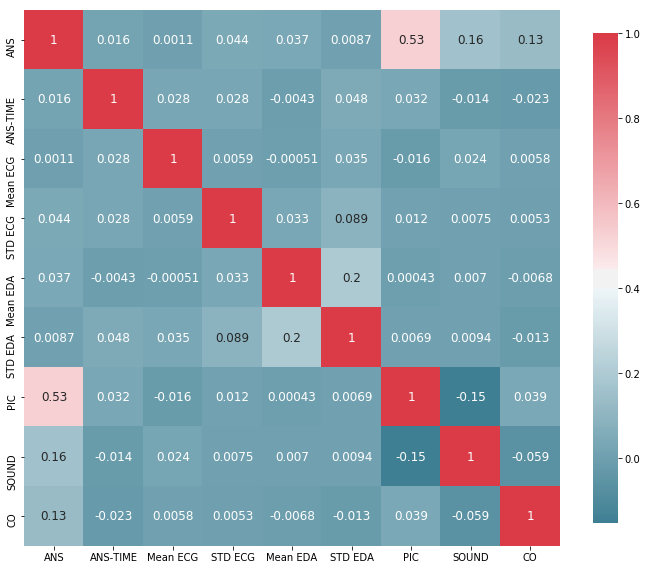

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns

def plot_correlation_map( df ):
    corr = scale_emotions.corr()
    _ , ax = plt.subplots( figsize =( 12 , 10 ) )
    cmap = sns.diverging_palette( 220 , 10 , as_cmap = True )
    _ = sns.heatmap(
        corr, 
        cmap = cmap,
        square=True, 
        cbar_kws={ 'shrink' : .9 }, 
        ax=ax, 
        annot = True, 
        annot_kws = { 'fontsize' : 12 }
    )
    
plot_correlation_map(scale_emotions)


Z uwagi na powyższą mapę korelacji zmiennych możemy przedstawić wniosek, że silnie skorelowane są ze sobą poniższe pary zmiennych:

1)ANS i PIC 

2)ANS i SOUND

3)MEAN EDA i STD EDA

4) ANS i CO

Podsumowując:

1) i 2) zależność pokazuje, iż nacechowanie obrazków i dźwięków jest silnie powiązane z odpowiedzią. Tak jak początkowo przypuszczaliśmy możemy to uznać za dobry znak. 

3) zależność pokazuje korelację średniej do jej odchylenia standardowego

4) wskazanie na zależność odpowiedzi od zbieżnego bądź nie nacechowania emocjonalnego obrazu i dźwięku


### Podział zbioru na trenujący i validujący
W problemie klasyfikacji, naszym zadaniem jest stworzenie algorytmu (programu), który na podstawie znanych sobie, opisanych wzorców, będzie w stanie efektywnie rozpoznawać wzorce nieopisane i dotąd sobie nieznane.
Potrzebujemy więc znaleźć sposób, aby zapewnić sobie to nieznane i nieopisane niezbędne przeprowadzenia procesu klasyfikacji. Na tę chwilę dysponujemy jedynie spójnym, jednolitym zbiorem danych. Dokonujemy podziału danych na część wykorzystywaną w uczeniu klasyfikatora (zbiór uczący) i późniejszej klasyfikacji na już wyuczonym klasyfikatorze (zbiór testowy). 

Najprostszym możliwym podejściem jest prosty, losowy podział zbioru na dwie części z zachowaniem jakiejś proporcji pomiędzy nimi. Służy do tego metoda train_test_split. Zastosujemy ją do podzielenia danych na dwa zbiory train_valid oraz test. Zbiór train_valid użyjemy do trenowania i validacji naszych modelów, natomiast zbiór testowy użyjemy do testowania wyników ostatecznego modelu z dobranymi parametrami. 

Będziemy używać walidacji krzyżowej k-fold. 
Podział prosty pozwala nam na co prawda na uzyskanie zbioru uczącego i testowego, ale nie możemy mieć przy nim pewności, że losowość nie dokonała się w nim w szczęśliwy dla klasyfikatora sposób, który wykaże jego wyższą jakość. Dla bezpieczeństwa i większej rzeczowości naszych badań musimy dokonać wielokrotnego podziału. Teoretycznie moglibyśmy wielokrotnie dokonać tego rodzaju podziału, aby zdobyć wiele par testowych i uczących, ale w takim podejściu istnieje duże prawdopodobieństwo występowania tych samych próbek w różnych zbiorach uczących. Metodą, która niweluje tego rodzaju problem jest k-fold cross-validation.

W podejściu krzyżowym dzielimy losowo zbiór danych na k możliwie równych sobie podzbiorów. Uzyskujemy dzięki temu k par, w których każdy z podzbiorów raz występuje jako zbiór uczący, a pozostała, połączona część zbioru jest wykorzystywana jako zbiór testowy.

Deklarujemy parametr k będący liczbą docelowych podziałów. Zwyczajowo stosuje się k równie 10 lub 30, w zależności od większości zbioru. Inicjalizujemy nim obiekt podziału cv. Następnie w pętli iterujemy ten obiekt i wyświetlamy wielkość podzielonych zbiorów oraz zawartość zmiennej train.

W poniższym kodzie podział na X(bez kolumny ANS) i Y(kolumna ANS)

In [5]:
from sklearn.model_selection import train_test_split
full_X = scale_emotions.drop('ANS', axis=1)

#podział na zbiory X i Y, które przekazujemy do walidacji krzyżowej
train_valid_X = full_X
train_valid_y = scale_emotions['ANS']

train_valid_X, test_X, train_valid_y, test_y = train_test_split(train_valid_X , train_valid_y , test_size=0.1, random_state=42)

# Opracowanie warstwy wyjaśniającej

## Projekt w teorii ML

### Uczenie nadzorowane
Uczenie nadzorowane opiera się na danych mających mniej lub bardziej jasną strukturę. Kolumny posiadają etykiety opisujące ich zawartość. W naszym przypadku posiadamy dane takie jak nacechowanie emocjonalne obrazka, dźwięku, dane dotyczące pomiarów EKG i GSR, wybory badanych w skali 1-5, czas odpowiedzi. 

Algorytmu używane przy uczeniu nadzorowanym szukają zależności pomiędzy opisanymi zmiennymi, w celu wyznaczenia wskazanej wartości. W naszym przypadku będziemy starali się przewidzieć wybory (skala 1-5) badanych mając podane wyżej wymienione wartości. Podsumowując, w tym przypadku dokładnie wiemy czego szukamy i na czym będziemy opierać swe decyzje.

### Dostępne algorytmy, a nasz problem... 
Oprócz podziału względem uczenia, zdecydowaną większość algorytmów możemy podzielić bazując na typie problemu z jakim się borykamy. Podstawowy podział wygląda następująco:

    Algorytmy klasyfikacyjne – wskazują jedną z wartości kategorycznych. Jeśli w danym problemie algorytm prognozuje jedną z dwóch wartości (prawda/fałsz, 0/1, tak/nie), mówimy o klasyfikacji dwuklasowej (ang. two-class classification). W przypadku problemów, w których zmienna predykcyjna może przyjąć więcej niż dwie wartości, mówimy o klasyfikacji wieloklasowej (ang. multiclass classification). 
    
    Algorytmy regresyjne – są to algorytmy, których celem jest estymacja wartości numerycznej, np. wartość akcji danej spółki, prognozowana wartość PKB, etc. 
    
    Algorytmy grupujące – jest to typ algorytmów, których zadaniem jest pogrupowanie zmiennych wejściowych w klastry, np. grupowanie klientów sklepu w oparciu o ich historię zakupów oraz adres zamieszkania.
    

W naszym przypadku występuje problem klasyfikacji. Będziemy korzystać z dostępnych metod rozwiązywania problemu, w celu jak najlepszego przydziału emocji badanego, biorąc pod uwagę dane z czujników (EKG i GSR) bądź nacechowanie materiału stymulującego. Będzie to klasyfikacja wieloklasowa, gdyż mamy dostępne 5 klas ({1,2,3,4,5}). 


### Przegląd algorytmów klasyfikacji: 

#### Regresja logistyczna
Metoda klasyfikacji dwu i wieloklasowej. Szybka i relatywnie prosta. Oparta jest o specyficzny system prawdopodobieństw i (tzw. szansach wystąpienia zdarzenia) i funkcji logitowej. Celem owej funkcji jest przekształcenie prawdopodobieństwa w logarytm szansy, tzw. logit. Regresja logistyczna daje wynik ciągły, sprowadzany do binarnego. Z powodzeniem zatem może być stosowana w systemach rekomendacji, z dowolną metodą sortowania wyników.

#### Liniowa analiza dyskryminacyjna
Używana w uczeniu maszynowym do znalezienia liniowej kombinacji cech, które najlepiej rozróżniają dwie lub więcej klas obiektów lub zdarzeń. Wynikowe kombinacje są używane jako klasyfikator liniowy lub, częściej, służą redukcji wymiarów do późniejszej klasyfikacji statystycznej.
Jednym z zastosowań jest rozpoznawanie twarzy. Obraz twarzy składający się z bardzo dużej liczby pikseli jest redukowany do mniejszego zbioru linowych kombinacji, które mogą następnie być wykorzystane do klasyfikacji.

#### Algorytm k najbliższych sąsiadów 
Jeden z algorytmów regresji nieparametrycznej używanych w statystyce do prognozowania wartości pewnej zmiennej losowej. Może również być używany do klasyfikacji. 
Algorytm polega na porównaniu wartości zmiennych objaśniających dla obserwacji C z wartościami tych zmiennych dla każdej obserwacji w zbiorze uczącym, wyborze k (ustalona z góry liczba) najbliższych do C obserwacji ze zbioru uczącego; uśrednieniu wartości zmiennej objaśnianej dla wybranych obserwacji, w wyniku czego uzyskujemy prognozę.
Algorytm k najbliższych sąsiadów jest użyteczny szczególnie wtedy, gdy zależność między zmiennymi objaśniającymi a objaśnianymi jest złożona lub nietypowa (np. niemonotoniczna), czyli trudna do modelowania w klasyczny sposób. W przypadku, gdy zależność ta jest łatwa do interpretacji (np. liniowa), a zbiór nie zawiera obserwacji odstających, metody klasyczne (np. regresja liniowa) dadzą zwykle dokładniejsze wyniki. 

#### Naiwny klasyfikator Bayesa
Metoda klasyfikacji dwu i wieloklasowej. Została oparta na teorii Bayesa, dotyczącej przewidywania kategorii w nieznanym zbiorze danych. Zakłada zupełną niezależność poszczególnych zmiennych (co rzadko ma odzwierciedlenie w świecie rzeczywistym). Stąd też jego nazwa – naiwny klasyfikator. Jego działanie opiera się na prostym prawdopodobieństwie warunkowym zdarzeń. Zaliczamy go do jednego z najprostszych algorytmów. Pomimo prostoty potrafi dawać lepsze rezultaty niż bardziej skomplikowane metody klasyfikacji. Zastosowanie: analiza tekstu, przewidywanie w czasie rzeczywistym, systemy rekomendacyjne. 

#### Maszyna wektorów nośnych
Algorytm opiera swe działanie na modelu abstrakcyjnej maszyny działającej jak klasyfikator. Jej celem jest oddzielenie obserwacji „granicą” o możliwie największym marginesie. Jeśli klasyfikator nie może znaleźć idealnego podziału, szuka rozwiązania dającego najlepsze rezultaty. SVM najlepiej spisuje się przy problemach dotyczących analizy tekstu i wykrywaniu obrazów. Wymaga niewielkiej ilości pamięci.

#### Drzewo decyzyjne
Algorytm oparty na strukturach o drzewiastym kształcie. Proces klasyfikacyjny zaczyna się w korzeniu drzewa i postępuje (w dół) aż do osiągnięcia liści, czyli tzw. klas terminalnych.
Drzewo decyzyjne jest budowane w sposób iteracyjny począwszy od korzenia, aż do liści. W kolejnych iteracjach dodawane są węzły składające się z odpowiednio dobranych atrybutów. Atrybuty są wybierane przez tzw. algorytm wyboru cech, w kolejności mającej zmaksymalizować zysk informacyjny z danego węzła. Cały proces ma swój koniec w momencie, gdy wszystkie liście są w tej samej klasie lub gdy zabranie klas do podziału.Budując pełne drzewo istnieje duże prawdopodobieństwo nadmiernego dopasowania algorytmu. Jest ono częstym problemem w przypadku podstawowej wersji drzewa decyzyjnego. 
Przykładowe zastosowanie: bankowość inwestycyjna, systemy oceny ryzyka kredytowego.

#### Lasy losowe
Działanie lasów losowych opiera się na klasyfikacji z użyciem grupy drzew decyzyjnych i największą różnicą w budowie obu algorytmów jest tzw. bootstrap. Algorytm rozpoczyna swe działanie od zbudowaniu wielu drzew decyzyjnych (liczba drzew jest definiowana przez użytkownika). Dla każdego drzewa wybierana jest losowa próba obserwacji, składająca się z kilku zmiennych objaśniających (liczba zmiennych w każdym z drzew jest drugim parametrem definiowanym przez użytkownika). Następnie w oparciu o mechanizm maksymalizacji zysku informacyjnego (o którym pisałem więcej w przypadku drzewa decyzyjnego) wybierane są kolejne atrybuty do podziału. Końcowa decyzja jest podejmowana w wyniku większościowego głosowania nad klasami wskazanymi przez poszczególne drzewa.Główną zaletą lasów losowych jest większa dokładność modelu niż w przypadku drzewa decyzyjnego. Nie ma oczywiście nic za darmo. Użyty mechanizm bootstrap ma negatywny wpływ na interpretowalność działania algorytmu.

#### Wzmocnione drzewo decyzyjne
Dwuklasowa wariacja drzewa decyzyjnego. Dzięki „niekończeniu” drzewa, unika ono największej bolączki podstawowej wersji drzewa – przeuczenia. Jest to możliwe dzięki ograniczeniu liczby podziałów gałęzi drzewa i jego głębokości. Dodatkowym elementem jest tu wzmocnienie (ang. boosting) polegające na losowaniu nowych ciągów uczących służących do uczenia kolejnych wersji klasyfikatorów. W praktyce algorytm buduje sekwencję drzew. Każde nowe drzewo uczy się kompensować błąd pozostawiony przez poprzednie drzewo. W rezultacie otrzymujemy bardzo dokładny algorytm, który niestety wymaga dużej ilości pamięci.

# Przygotowanie podstawowych modeli

Najbardziej prymitywne rozwiązanie, do którego będziemy porównywać wszystkie kolejne to algorytm ZeroR. 

Algorytm ZeroR(ang. Zero Rule) ignoruje wszystkie cechy, oprócz etykiet. 
Na ich podstawie, sprawdza najczęściej występującą klasę itworzy klasyfikator który zawsze będzie ją zwracać. 
Zatem algorytm ZeroR zawsze przypisuje nowe obserwacje do tej samej klasy (klasy większościowej), niezależnie od wartości cech.


In [6]:
print('Klasyfikator ZeroR')
#ilość odpowiedzi najczęściej występująca do ilości wszystkich odpowiedzi
print(scale_emotions['ANS'].value_counts().max()/scale_emotions.shape[0])

Klasyfikator ZeroR
0.3689151133163471


Przygotowujemy podstawowe modele rozwiązania dla naszego problemu i porównujemy ich skuteczność z domyślnymi parametrami. Znając specyfikę każdego klasyfikatora, wybierzemy najlepszy i w dalszej części będziemy dobierać jego parametry tak, aby usprawnić działanie modelu w celu uzyskania lepszego rezultatu. 

Problem, który rozwiązujemy to problem klasyfikacji, zatem mając dane będziemy starać się przydzielić każdy rekord do konkretnej klasy (w naszym problemie mamy ich 5 gdyż można ocenić swoją emocję w skali 1-5). 

Podstawowe klasyfikatory to:

    LogisticRegression
    LinearDiscriminantAnalysis
    KNeighborsClassifier
    GaussianNB
    SVC
    DecisionTreeClassifier
    RandomForestClassifier
    GradientBoostingClassifier
   

In [8]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.tree import DecisionTreeClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier , GradientBoostingClassifier
from sklearn.metrics import confusion_matrix

#przygotowanie zbioru modeli- klasyfikatorów
models = []
models.append(('LogisticRegression', LogisticRegression(solver='liblinear', multi_class='ovr')))
models.append(('LinearDiscriminantAnalysis', LinearDiscriminantAnalysis()))
models.append(('KNeighborsClassifier', KNeighborsClassifier()))
models.append(('GaussianNB', GaussianNB()))
models.append(('SVC', SVC(gamma='auto')))
models.append(('DecisionTreeClassifier', DecisionTreeClassifier()))
models.append(('RandomForestClassifier', RandomForestClassifier(n_estimators=100)))
models.append(('GradientBoostingClassifier', GradientBoostingClassifier()))

#w pętli będziemy ewaluować każdy model 
results = []
names = []
for name, model in models:
    
    #Deklarujemy liczbę docelowych podziałów =10
    kfold = StratifiedKFold(n_splits=10, random_state=1, shuffle=True)
    
    #wygenerowanie wyniku poprzez walidację krzyżową z użyciem danego estymatora
    cv_results = cross_val_score(model, train_valid_X , train_valid_y, cv=kfold, scoring='accuracy')
    
    #wyświetlanie wyników
    results.append(cv_results)
    names.append(name)
    print('%s: %f (%f)' % (name, cv_results.mean(), cv_results.std()))
    

LogisticRegression: 0.445540 (0.011222)
LinearDiscriminantAnalysis: 0.439888 (0.014288)
KNeighborsClassifier: 0.500676 (0.022422)
GaussianNB: 0.429896 (0.018455)
SVC: 0.515581 (0.014453)
DecisionTreeClassifier: 0.452540 (0.023802)
RandomForestClassifier: 0.532276 (0.019215)
GradientBoostingClassifier: 0.547026 (0.019191)


Możemy zauważyć, iż wszystkie wyżej wymienione klasyfikatory cechuje o wiele większa skuteczność, niż w przypadku algorytmu ZeroR(32-37%).<br>
Dla wszystkich powyższych klasyfikatorów spróbujemy ustalić optymalne parametry, tak aby osiągnąć lepsze rezultaty. 

# Dopracowanie parametrów modeli, ustalenie optymalnych parametrów

W projektach ML algorytmy posiadają hiperparametry, które pozwalają na dopasowania działania algorytmu do konkretnego przypadku (zbioru danych). 
Prawidłowy ich dobór pozwala na osiągnięcie lepszych rezultatów, bądź skrócenie czasu działania i mniejsze zużycie zasobów komputera (pamięci). 
Dobór hiperparametrów jest więc często kluczową sprawą, jednakże jest niejednokrotnie bardzo czasochłonnym zajęciem. 
Nie wszystkie hiperparametry należy zmieniać, najlepiej skupić się na wybranych i kluczowych dla danego algorytmu.  

W celu poszukiwania najlepszych parametrów będziemy używać metody "grid search", który polega na znalezieniu najlepszej kombinacji hiperparametrów i ich wartosci dla zadanego modelu. 
Zazwyczaj wyszukiwanie "grid search jest wspierane poprzez walidację krzyżową, co zostało również zaimplementowane w poniższym kodzie. 

Grid search to algorytm trenujący zadany model z wykorzystaniem zbioru wartości hiperparametrów należących do iloczynu kartezjańskiego podanych zbiorów dla poszczególnych hiperparametrów. 

Wybieramy hiperparametry i ich wartości: 
1. LogisticRegression:solvers(dobór algorytmu optymalizującego), penalty(norma użyta podczas penalizacji), c_values(moc regularyzacji). 
2. LinearDiscriminantAnalysis:solvers, shrinkages(ubytek - wpływa na wynik algorytmu)
3. KNeighborsClassifier:n_neighbors( ilość najbliższych obiektów w przestrzeni n-wymiarowej), weights(dobór wagi obiektów), metric(metryka dystansowa dla drzewa)
4. DecisionTreeClassifier:criterion(kryterium mierzenia jakości podziału), splitter(metoda podziału), max_depth(maksymalna głębokość drzewa), max_features(funkcja określająca maksymalną liczbę cech)
5. RandomForestClassifier:n_estimators(liczba drzew w "lesie"), max_features

Hiperparametry oraz ich wartości zostały dobrane dla każdego algorytmu indywidualnie w oparciu o liczne artykuły, instrukcje oraz własne przekonanie co do wpływu poszczególnych hiperparametrów na jakość algorytmu.


W optymalizowaniu parametrów modeli nie będziemy brali pod uwagę następujących klasyfikatorów:
- SVC,
- GradientBoostingClassifier<br>
Ze względu na zbyt długi czas ich wykonywania (nie dysponujemy, aż tak dobrym sprzętem), oraz:
- GaussianNB<br>
Ponieważ nie przyjmuje on, żadnych hiperparametrów. (Przyjmuje jedynie priorytety prawdopodobieństw dla poszczególnych klas)



In [9]:
# LogisticRegression

from sklearn.datasets.samples_generator import make_blobs
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression

# zdefiniowanie zbioru
X, y = train_valid_X , train_valid_y

# zdefiniowanie modelu i hiperparametrów
model = LogisticRegression()
solvers = ['newton-cg', 'lbfgs', 'liblinear']
penalty = ['l2']
c_values = [100, 10, 1.0, 0.1, 0.01]

# definiowanie grid search
grid = dict(solver=solvers,penalty=penalty,C=c_values)
cv = StratifiedKFold(n_splits=10, random_state=1, shuffle=True)
grid_search = GridSearchCV(estimator=model, param_grid=grid, n_jobs=-1, cv=cv, scoring='accuracy',error_score=0)
grid_result = grid_search.fit(X, y)

# podsumowanie wynikow
print("Najlepszy: %f hiperparametry %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) z: %r" % (mean, stdev, param))

Najlepszy: 0.454031 hiperparametry {'C': 0.01, 'penalty': 'l2', 'solver': 'liblinear'}
0.447325 (0.012484) z: {'C': 100, 'penalty': 'l2', 'solver': 'newton-cg'}
0.447027 (0.013310) z: {'C': 100, 'penalty': 'l2', 'solver': 'lbfgs'}
0.446878 (0.014103) z: {'C': 100, 'penalty': 'l2', 'solver': 'liblinear'}
0.445984 (0.012350) z: {'C': 10, 'penalty': 'l2', 'solver': 'newton-cg'}
0.446133 (0.012569) z: {'C': 10, 'penalty': 'l2', 'solver': 'lbfgs'}
0.445686 (0.011948) z: {'C': 10, 'penalty': 'l2', 'solver': 'liblinear'}
0.445984 (0.011442) z: {'C': 1.0, 'penalty': 'l2', 'solver': 'newton-cg'}
0.445984 (0.011384) z: {'C': 1.0, 'penalty': 'l2', 'solver': 'lbfgs'}
0.445537 (0.011224) z: {'C': 1.0, 'penalty': 'l2', 'solver': 'liblinear'}
0.445537 (0.009589) z: {'C': 0.1, 'penalty': 'l2', 'solver': 'newton-cg'}
0.445388 (0.009791) z: {'C': 0.1, 'penalty': 'l2', 'solver': 'lbfgs'}
0.447176 (0.011801) z: {'C': 0.1, 'penalty': 'l2', 'solver': 'liblinear'}
0.443898 (0.006891) z: {'C': 0.01, 'penalty'

In [10]:
# LinearDiscriminantAnalysis

from sklearn.datasets.samples_generator import make_blobs
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import GridSearchCV


# zdefiniowanie zbioru
X, y = train_valid_X , train_valid_y

# zdefiniowanie modelu i hiperparametrów
model = LinearDiscriminantAnalysis()
solvers = ['lsqr','eigen']
shrinkages = [0.1, 0.3, 0.6, 0.9]

# definiowanie grid search
grid = dict(solver=solvers,shrinkage=shrinkages)
cv = StratifiedKFold(n_splits=10, random_state=1, shuffle=True)
grid_search = GridSearchCV(estimator=model, param_grid=grid, n_jobs=-1, cv=cv, scoring='accuracy',error_score=0)
grid_result = grid_search.fit(X, y)

# podsumowanie wynikow
print("Najlepszy: %f hiperparametry %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) z: %r" % (mean, stdev, param))

Najlepszy: 0.447027 hiperparametry {'shrinkage': 0.1, 'solver': 'lsqr'}
0.447027 (0.009008) z: {'shrinkage': 0.1, 'solver': 'lsqr'}
0.436597 (0.021382) z: {'shrinkage': 0.1, 'solver': 'eigen'}
0.436448 (0.007951) z: {'shrinkage': 0.3, 'solver': 'lsqr'}
0.383698 (0.024020) z: {'shrinkage': 0.3, 'solver': 'eigen'}
0.386381 (0.006870) z: {'shrinkage': 0.6, 'solver': 'lsqr'}
0.344360 (0.019605) z: {'shrinkage': 0.6, 'solver': 'eigen'}
0.375503 (0.011033) z: {'shrinkage': 0.9, 'solver': 'lsqr'}
0.279392 (0.017200) z: {'shrinkage': 0.9, 'solver': 'eigen'}


In [13]:
# KNeighborsClassifier

from sklearn.datasets.samples_generator import make_blobs
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier

# zdefiniowanie zbioru
X, y = train_valid_X , train_valid_y

# zdefiniowanie modelu i hiperparametrów
model = KNeighborsClassifier()
n_neighbors = range(1, 21, 2)
weights = ['uniform', 'distance']
metric = ['euclidean', 'manhattan', 'minkowski']

# definiowanie grid search
grid = dict(n_neighbors=n_neighbors,weights=weights,metric=metric)
cv = StratifiedKFold(n_splits=10, random_state=1, shuffle=True)
grid_search = GridSearchCV(estimator=model, param_grid=grid, n_jobs=-1, cv=cv, scoring='accuracy',error_score=0)
grid_result = grid_search.fit(X, y)

# podsumowanie wynikow
print("Najlepszy: %f hiperparametry %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) z: %r" % (mean, stdev, param))

Najlepszy: 0.523171 hiperparametry {'metric': 'manhattan', 'n_neighbors': 17, 'weights': 'distance'}
0.452243 (0.018061) z: {'metric': 'euclidean', 'n_neighbors': 1, 'weights': 'uniform'}
0.452243 (0.018061) z: {'metric': 'euclidean', 'n_neighbors': 1, 'weights': 'distance'}
0.481448 (0.019477) z: {'metric': 'euclidean', 'n_neighbors': 3, 'weights': 'uniform'}
0.479809 (0.020118) z: {'metric': 'euclidean', 'n_neighbors': 3, 'weights': 'distance'}
0.500671 (0.022422) z: {'metric': 'euclidean', 'n_neighbors': 5, 'weights': 'uniform'}
0.490836 (0.023534) z: {'metric': 'euclidean', 'n_neighbors': 5, 'weights': 'distance'}
0.508270 (0.020431) z: {'metric': 'euclidean', 'n_neighbors': 7, 'weights': 'uniform'}
0.503502 (0.018577) z: {'metric': 'euclidean', 'n_neighbors': 7, 'weights': 'distance'}
0.511995 (0.015103) z: {'metric': 'euclidean', 'n_neighbors': 9, 'weights': 'uniform'}
0.511250 (0.019312) z: {'metric': 'euclidean', 'n_neighbors': 9, 'weights': 'distance'}
0.519893 (0.013419) z: {

In [14]:
# DecisionTreeClassifier

from sklearn.datasets.samples_generator import make_blobs
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier

# zdefiniowanie zbioru
X, y = train_valid_X , train_valid_y

# zdefiniowanie modelu i hiperparametrów
model = DecisionTreeClassifier()
criterion = ['gini', 'entropy']
splitter = ['best', 'random']
max_depth = [3, 7, 9]
max_features = ['auto', 'sqrt', 'log2']

# definiowanie grid search
grid = dict(criterion=criterion,splitter=splitter, max_depth = max_depth, max_features=max_features)
cv = StratifiedKFold(n_splits=10, random_state=1, shuffle=True)
grid_search = GridSearchCV(estimator=model, param_grid=grid, n_jobs=-1, cv=cv, scoring='accuracy',error_score=0)
grid_result = grid_search.fit(X, y)

# podsumowanie wynikow
print("Najlepszy: %f hiperparametry %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) z: %r" % (mean, stdev, param))

Najlepszy: 0.530472 hiperparametry {'criterion': 'gini', 'max_depth': 7, 'max_features': 'log2', 'splitter': 'best'}
0.447176 (0.041045) z: {'criterion': 'gini', 'max_depth': 3, 'max_features': 'auto', 'splitter': 'best'}
0.422143 (0.030287) z: {'criterion': 'gini', 'max_depth': 3, 'max_features': 'auto', 'splitter': 'random'}
0.471018 (0.046547) z: {'criterion': 'gini', 'max_depth': 3, 'max_features': 'sqrt', 'splitter': 'best'}
0.423037 (0.031443) z: {'criterion': 'gini', 'max_depth': 3, 'max_features': 'sqrt', 'splitter': 'random'}
0.485174 (0.030475) z: {'criterion': 'gini', 'max_depth': 3, 'max_features': 'log2', 'splitter': 'best'}
0.418567 (0.024582) z: {'criterion': 'gini', 'max_depth': 3, 'max_features': 'log2', 'splitter': 'random'}
0.502310 (0.020398) z: {'criterion': 'gini', 'max_depth': 7, 'max_features': 'auto', 'splitter': 'best'}
0.446282 (0.016297) z: {'criterion': 'gini', 'max_depth': 7, 'max_features': 'auto', 'splitter': 'random'}
0.510207 (0.023267) z: {'criterion'

In [15]:
# RandomForestClassifier

from sklearn.datasets.samples_generator import make_blobs
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier

# zdefiniowanie zbioru
X, y = train_valid_X , train_valid_y

# zdefiniowanie modelu i hiperparametrów
model = RandomForestClassifier()
n_estimators = [10, 100, 1000]
max_features = ['sqrt', 'log2']

# definiowanie grid search
grid = dict(n_estimators=n_estimators,max_features=max_features)
cv = StratifiedKFold(n_splits=10, random_state=1, shuffle=True)
grid_search = GridSearchCV(estimator=model, param_grid=grid, n_jobs=-1, cv=cv, scoring='accuracy',error_score=0)
grid_result = grid_search.fit(X, y)

# podsumowanie wynikow
print("Najlepszy: %f hiperparametry %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) z: %r" % (mean, stdev, param))

Najlepszy: 0.537774 hiperparametry {'max_features': 'sqrt', 'n_estimators': 1000}
0.511697 (0.019035) z: {'max_features': 'sqrt', 'n_estimators': 10}
0.531217 (0.025112) z: {'max_features': 'sqrt', 'n_estimators': 100}
0.537774 (0.021101) z: {'max_features': 'sqrt', 'n_estimators': 1000}
0.514230 (0.018203) z: {'max_features': 'log2', 'n_estimators': 10}
0.531515 (0.018435) z: {'max_features': 'log2', 'n_estimators': 100}
0.534049 (0.021120) z: {'max_features': 'log2', 'n_estimators': 1000}


Z wszystkich powyżej przetestowanych algorytmów wybieramy 5 z najlepszymi wynikami i poddamy je dalszej analizie:

1) SVC: 0.515581 (0.014453) <br>
2) GradientBoostingClassifier: 0.546728 (0.019247) <br>
3) KNeighborsClassifier: 0.523171 (0.014188) with: {'metric': 'manhattan', 'n_neighbors': 17, 'weights': 'distance'} <br>
4) DecisionTreeClassifier: 0.530472 (0.019303) z: {'criterion': 'gini', 'max_depth': 7, 'max_features': 'log2', 'splitter': 'best'} <br>
5) RandomForestClassifier: 0.537774 (0.021101) z: {'max_features': 'sqrt', 'n_estimators': 1000} <br>

# Porównanie modeli i wybór najlepszego


In [16]:
import numpy as np
def plot_confusion_matrix(cf_matrix, model_title):
    sns.heatmap(cf_matrix/np.sum(cf_matrix), annot=True, fmt='.2%',cmap='Greens')
    plt.ylabel('True Label')
    plt.xlabel('Predicted Label')
    plt.title('Confusion Matrix of ' + model_title)
    plt.show()

SVC
Na zbiorze treningowym: 0.538370 
Na zbiorze testowym: 0.553619 


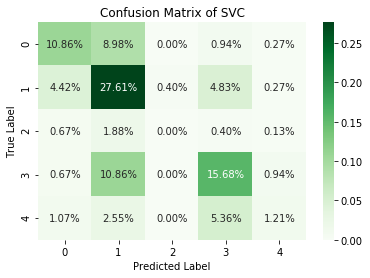

GradientBoostingClassifier
Na zbiorze treningowym: 0.636418 
Na zbiorze testowym: 0.554960 


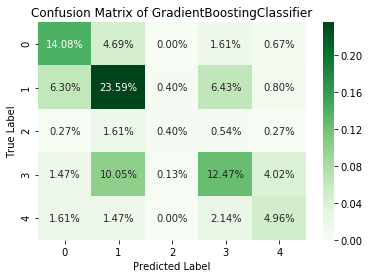

KNeighborsClassifier
Na zbiorze treningowym: 1.000000 
Na zbiorze testowym: 0.532172 


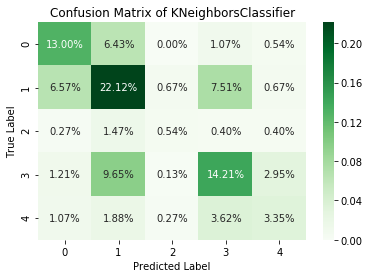

DecisionTreeClassifier
Na zbiorze treningowym: 0.573387 
Na zbiorze testowym: 0.548257 


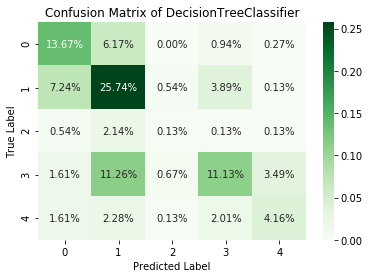

RandomForestClassifier
Na zbiorze treningowym: 1.000000 
Na zbiorze testowym: 0.560322 


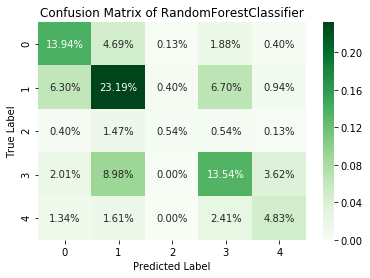

In [20]:
best_models= []
best_models.append(('SVC', SVC(gamma='auto')))
best_models.append(('GradientBoostingClassifier', GradientBoostingClassifier()))
best_models.append(('KNeighborsClassifier', KNeighborsClassifier(metric='manhattan', n_neighbors=17, weights='distance')))
best_models.append(('DecisionTreeClassifier', DecisionTreeClassifier(criterion='gini', max_depth=7, max_features='log2', splitter='best')))
best_models.append(('RandomForestClassifier', RandomForestClassifier(max_features='sqrt', n_estimators=1000)))


names = []
confusion_matrixs = []

for name, model in best_models:    
    model.fit(train_valid_X,train_valid_y)
    result_test = model.score(test_X,test_y)
    result_trained = model.score(train_valid_X,train_valid_y)
    
    prediction = model.predict(test_X)
    
    print(name)
    print('Na zbiorze treningowym: %f ' % (result_trained))
    print('Na zbiorze testowym: %f ' % (result_test))
    cf_matrix = confusion_matrix(test_y,prediction)
    confusion_matrixs.append(cf_matrix)
    plot_confusion_matrix(cf_matrix,name)

# Wnioski i podsumowanie

Uważamy, iż spośród poddanych analizie klasyfikatorów z pewnością należy wykluczyć:
- naiwny klasyfikatorB ayesa(GaussianNB), 
- regresję logistyczną(LogisticRegression), 
- liniową analizę dyskryminacyjną(LinearDiscriminantAnalysis). <br>
Skuteczność tych algorytmów jest o wiele mniejsza od pozostałych. Dodatkowo algorytmy te słabiej radzą sobię z problemami w których ciężko dopatrzeć się prostych wzorców (a takim niewątpliwie jest rozważany problem predykcji emocji). 

Kolejnymi algorytmami z jakich rezygnujemy to:
- lasy losowe(RandomForestClassifier),
- algorytm k najbliższych sąsiadów(KNeighborsClassifier).<br>
W ich przypadku możemy zaobserwować zjawisko overfittingu, tz. skuteczność algorytmu jest znaczaco wyższa dla danych treningowych w porównaniu do skuteczności na danych testowych. W obu tych przypadkach skuteczność algorytmu dla danych treningowych wyniosła 100%.

Pozostałe wytrenowane model, a więc:
- maszyna wektorów nośnych(SVC),
- wzmocnione drzewo decyzyjne(GradientBoostingClassifier),
- drzewo decyzyjne(DecisionTreeClassifier).<br>
Radzą sobie znacznie lepiej niż przyjęty za punkt odniesienia klasyfikator “Zero Rules”. Wyniki na poziomie ~55% są bardzo satysfakcjonujące. Czy można więc jeszcze zwiększyć skuteczność naszego algorytmu? Z przedstawionych powyżej macierzy błędu możemy zauważyć, że jest jeszcze miejsce do poprawy, ale czy napewno? Musimy pamiętać o tym, że emocje są mocno subiektywne. Każdy z nas jest inny, ma inne poczucie humoru, obawia się innych rzeczy. W tym przypadku poprawę algorytmu można by było osiągnąć dodatkowymi danymi cechującymi badaną osobę (jednak nie są one tematem naszego projektu).

Ciekawe "zjawisko" możemy zaobserować dla wytrenowanego modelu z klasyfikatora SVC, tutaj lepszy wynik osiągneliśmy dla danych ze zbioru testowego niż z treningowego. Świadczyć to może o tym, że dla lepiej dopasowanych hyperparametrów model byłby jeszcze skuteczniejszy (jednak ze względu na dużą złożoność czasową badania hyper paramatrów dla tego klasyfikatora nie udało nam się tego wykonać). 

